# Import the libraries

In [1]:
import pandas as pd
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
import lightgbm as lgb
import numpy as np
import matplotlib.pyplot as plt
from pycaret.classification import *

In [2]:
df = pd.read_csv('the_data_set.csv')
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [4]:
df = df.fillna('None')
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,None,None,None,None,None,None,None,None,None,None,None
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,None,None,None,None,None,None,None,None,None,None,None,None,None
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,None,None,None,None,None,None,None,None,None,None,None,None,None
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,None,None,None,None,None,None,None,None,None,None,None


In [23]:
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
for feature in obj_feat:
    df[feature] = pd.Series(df[feature], dtype="category")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3912
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Disease           3913 non-null   category
 1   Symptom_1         3913 non-null   category
 2   Symptom_2         3913 non-null   category
 3   Symptom_3         3913 non-null   category
 4   Symptom_4         3913 non-null   category
 5   Symptom_5         3913 non-null   category
 6   Symptom_6         3913 non-null   category
 7   Symptom_7         3913 non-null   category
 8   Symptom_8         3913 non-null   category
 9   Symptom_9         3913 non-null   category
 10  Symptom_10        3913 non-null   category
 11  Symptom_11        3913 non-null   category
 12  Symptom_12        3913 non-null   category
 13  Symptom_13        3913 non-null   category
 14  Symptom_14        3913 non-null   category
 15  Symptom_15        3913 non-null   category
 16  Symptom_16        3913 n

In [7]:
def add_columns(df):
  

  # Generate random ages for the patients.
    ages = np.random.randint(15, 65, len(df))

  # Generate random pregnancy statuses for the patients.
    pregnant = np.random.choice(["Yes", "No"], len(df), p=[0.1, 0.9])

  # Generate random chronic disease statuses for the patients.
    chronic_diseases = np.random.choice(["Yes", "No"], len(df), p=[0.2, 0.8])

  # Add the new columns to the DataFrame.
    df["ages"] = ages
    df["pregnant"] = pregnant
    df["chronic_diseases"] = chronic_diseases

    return df

# Load the dataset.


# Add the new columns to the DataFrame.
df = add_columns(df)

In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,ages,pregnant,chronic_diseases
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,...,None,None,None,None,None,None,None,31,No,No
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,None,None,36,No,No
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,None,None,23,No,No
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,None,None,39,No,No
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,...,None,None,None,None,None,None,None,48,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4909,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,None,None,...,None,None,None,None,None,None,None,51,No,No
4910,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,...,depression,irritability,abnormal_menstruation,None,None,None,None,52,No,No
4911,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,...,abnormal_menstruation,None,None,None,None,None,None,28,Yes,No
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,None,None,None,...,None,None,None,None,None,None,None,60,No,No


# visualisation

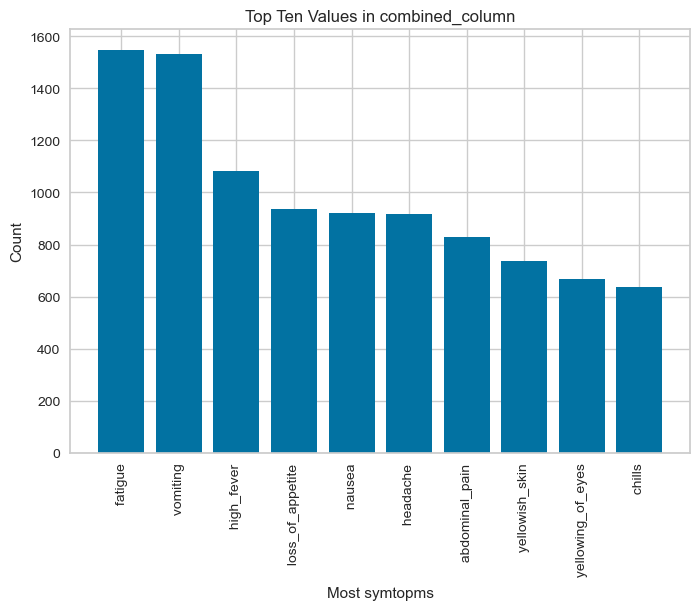

In [10]:
# Assuming you have a DataFrame called df
# Replace 'df' with the actual name of your DataFrame

# Create a new DataFrame with each value in a separate row
result = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
                                'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
                                'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 
                                'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']].stack().reset_index(level=1, drop=True).reset_index()
result.columns = ['index', 'combined_column']

# Now, 'result' contains each value in a separate row
result = result[result['combined_column']!= 'None']

# Assuming you have the 'result' DataFrame with the 'combined_column' column

# Count the occurrences of each value in 'combined_column'
value_counts = result['combined_column'].value_counts()

# Select the top ten most common values
top_ten = value_counts.head(10)

# Plot the count bar chart for the top ten values
plt.bar(top_ten.index, top_ten.values)

# Add labels and title
plt.xlabel('Most symtopms')
plt.ylabel('Count')
plt.title('Top Ten Values in combined_column')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

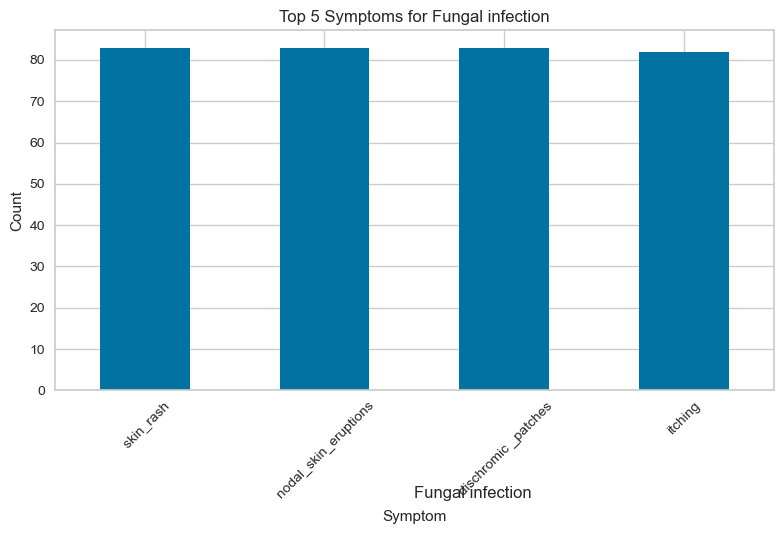

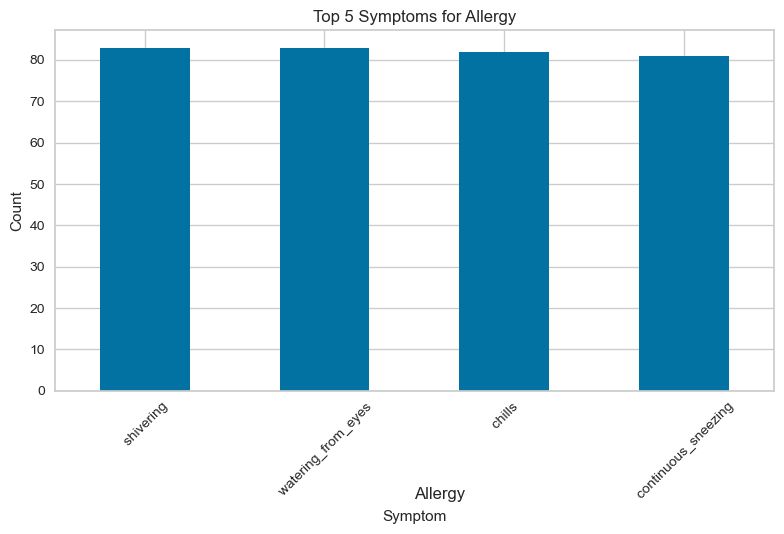

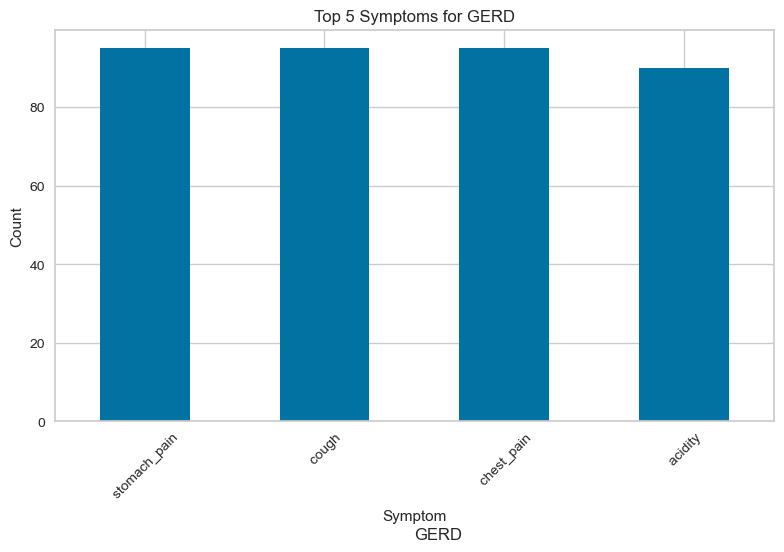

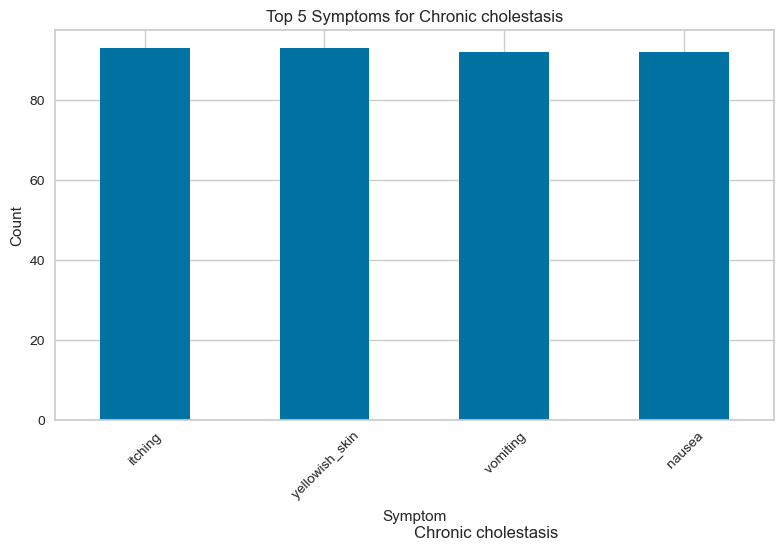

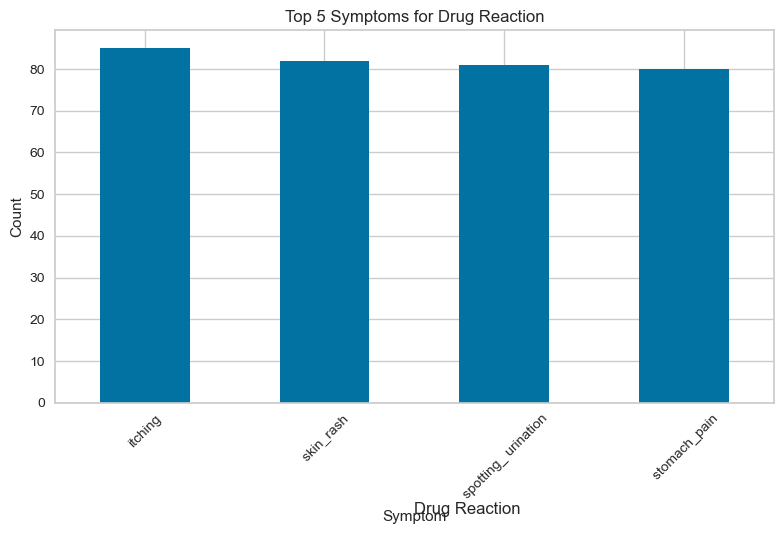

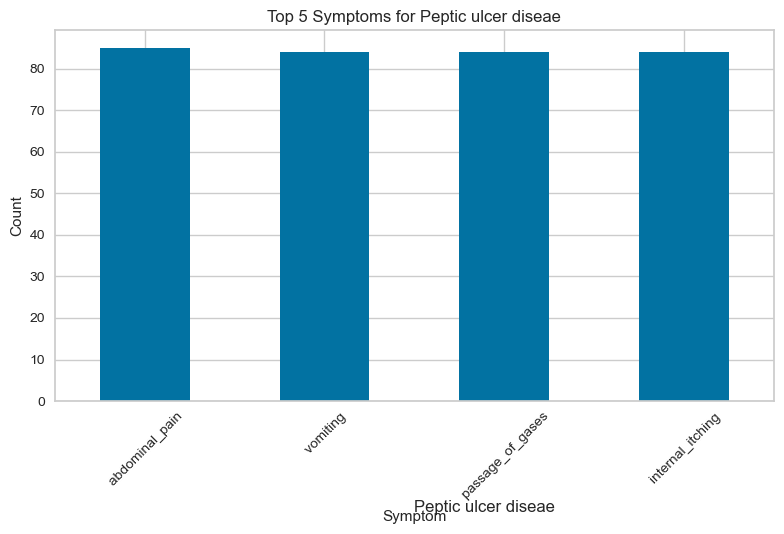

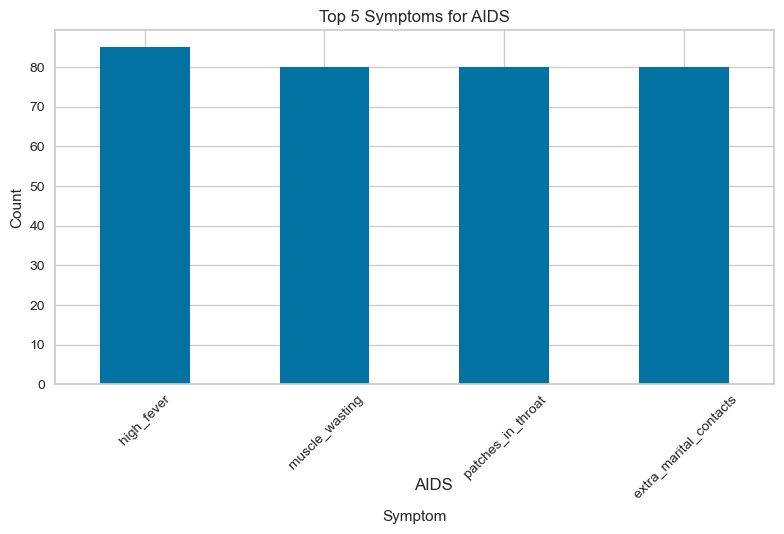

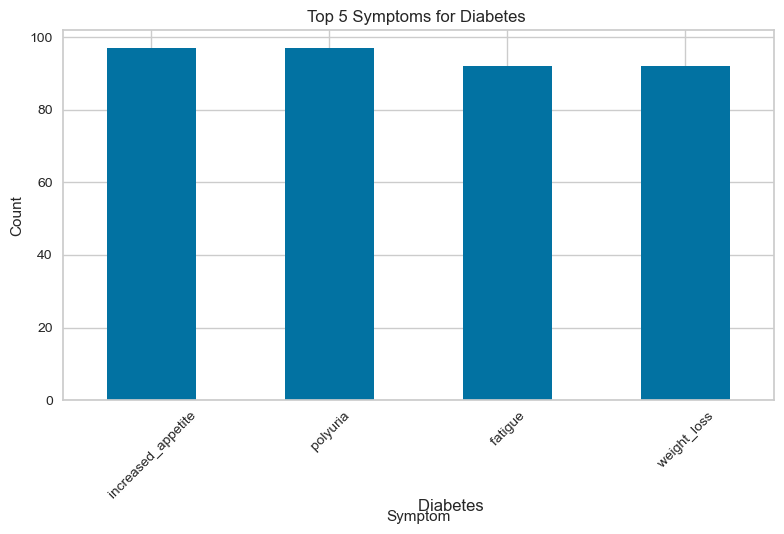

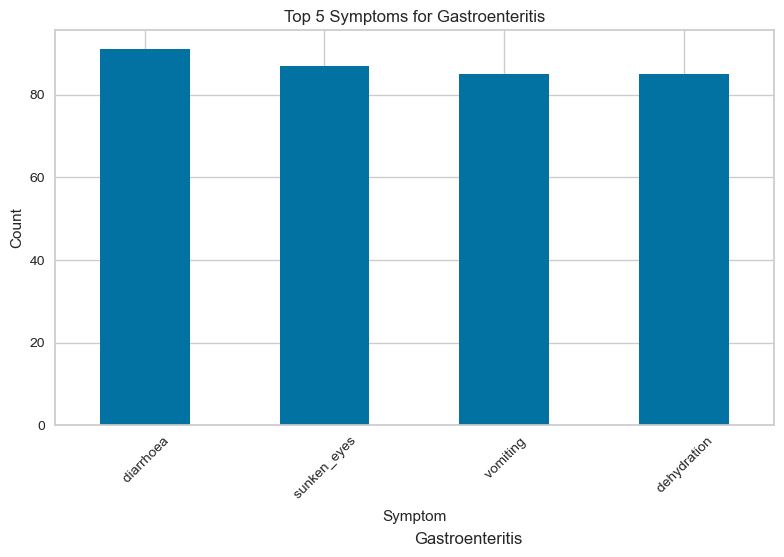

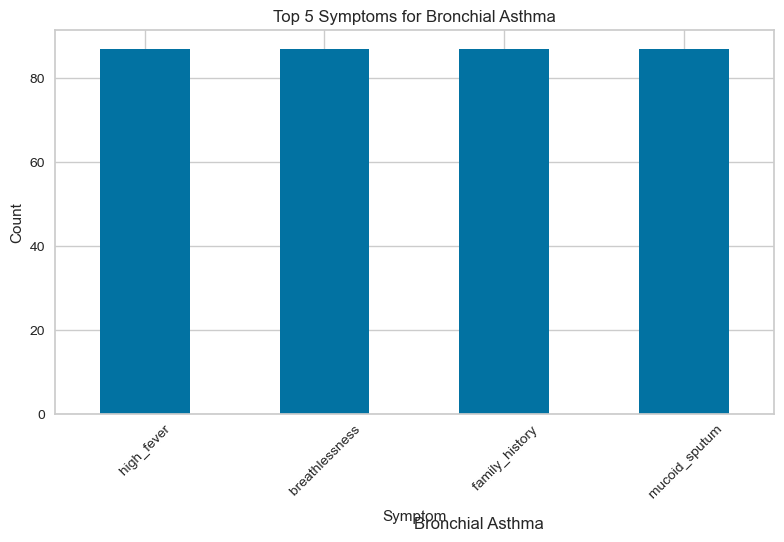

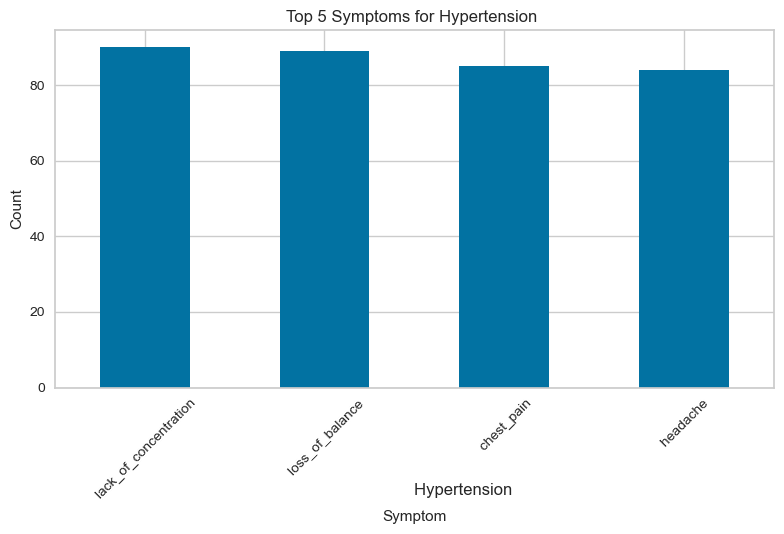

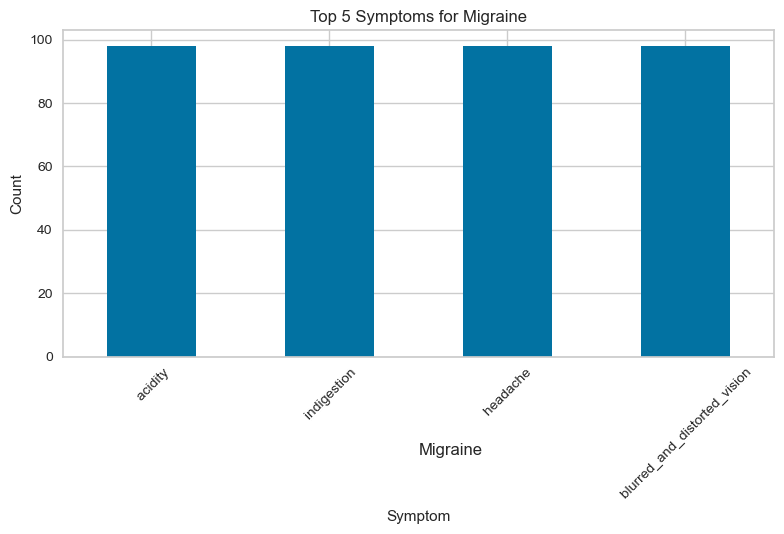

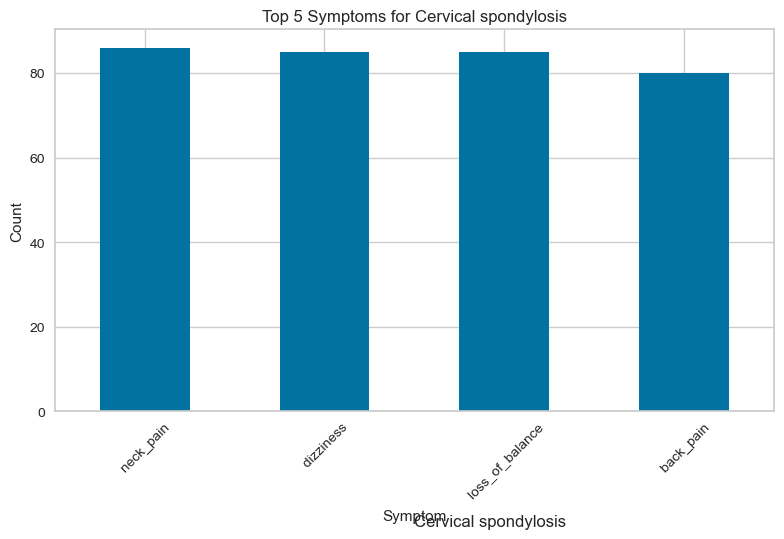

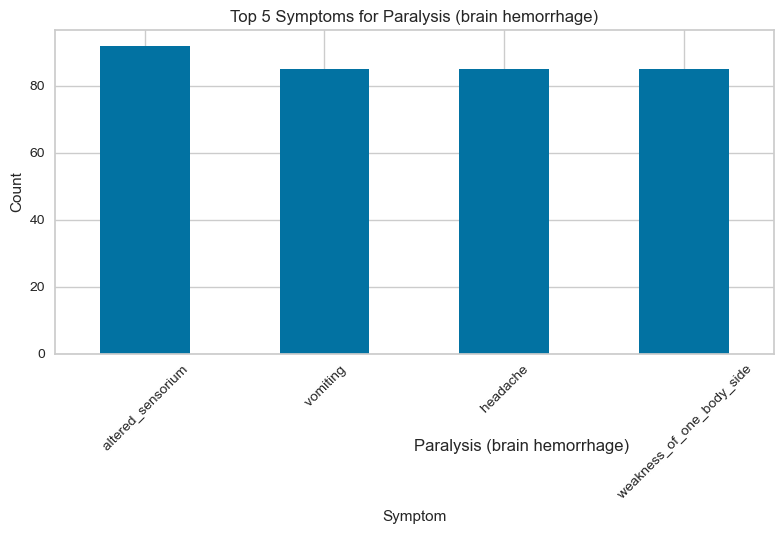

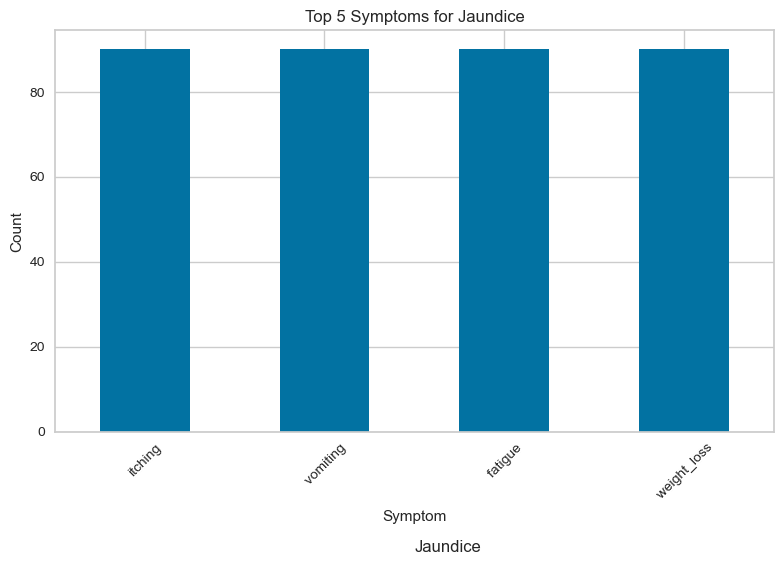

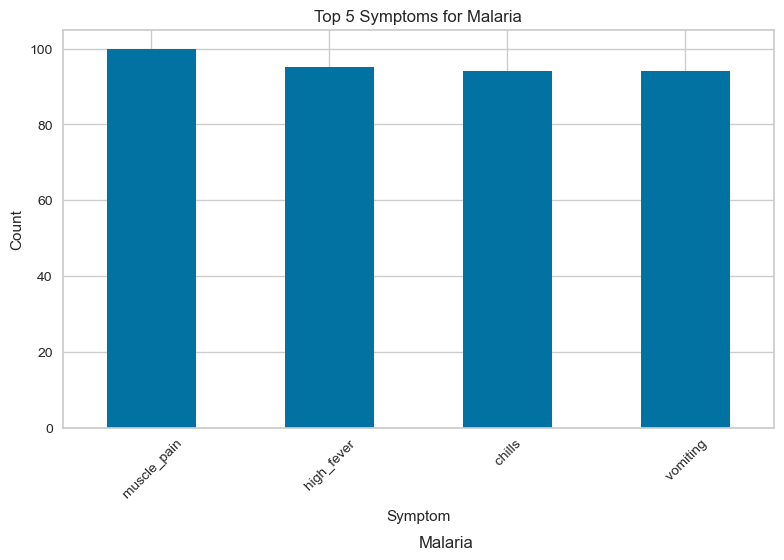

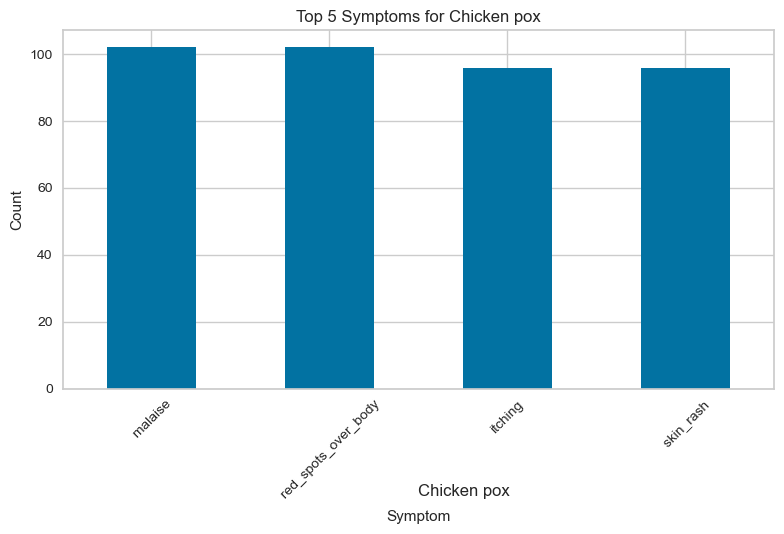

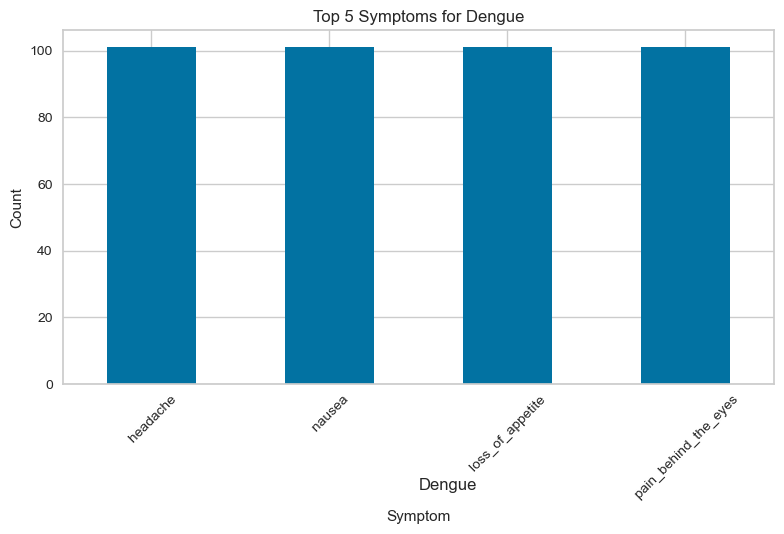

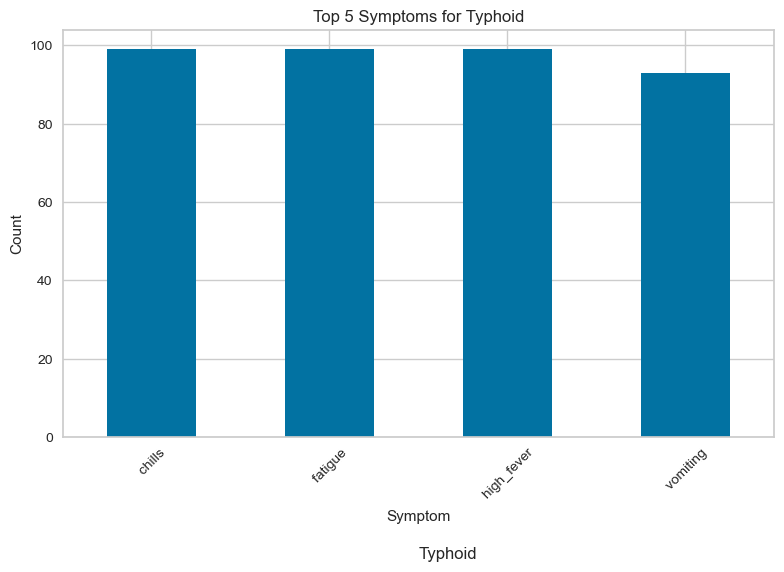

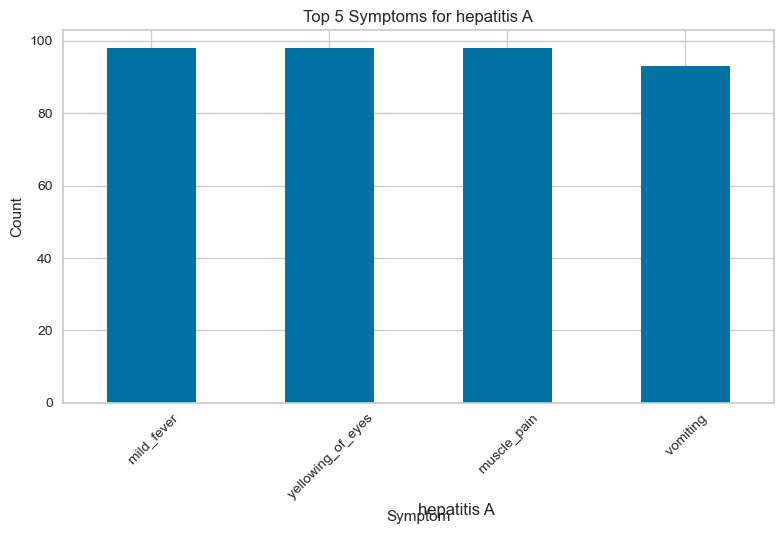

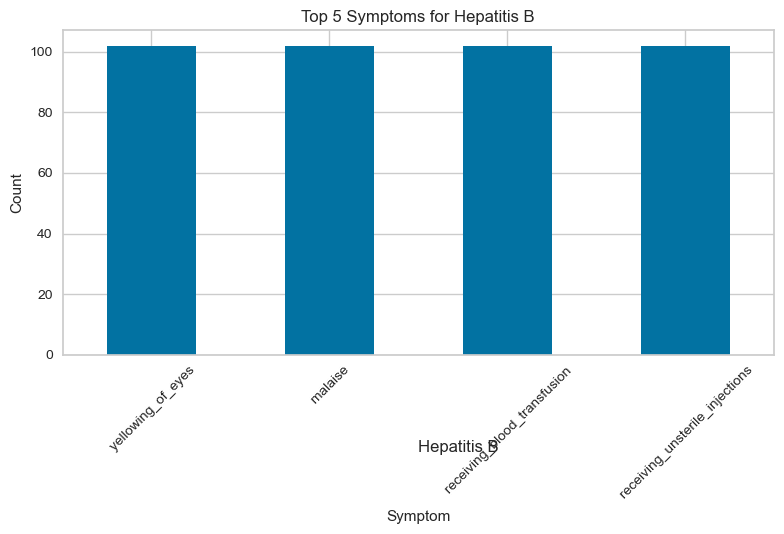

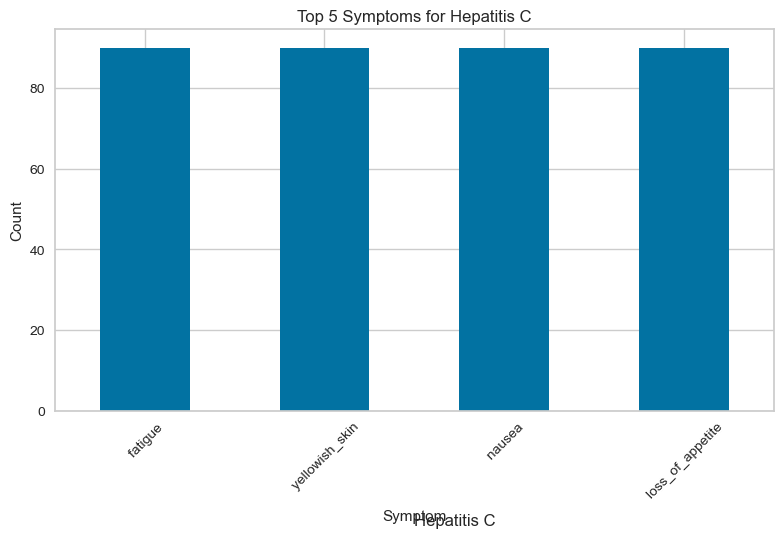

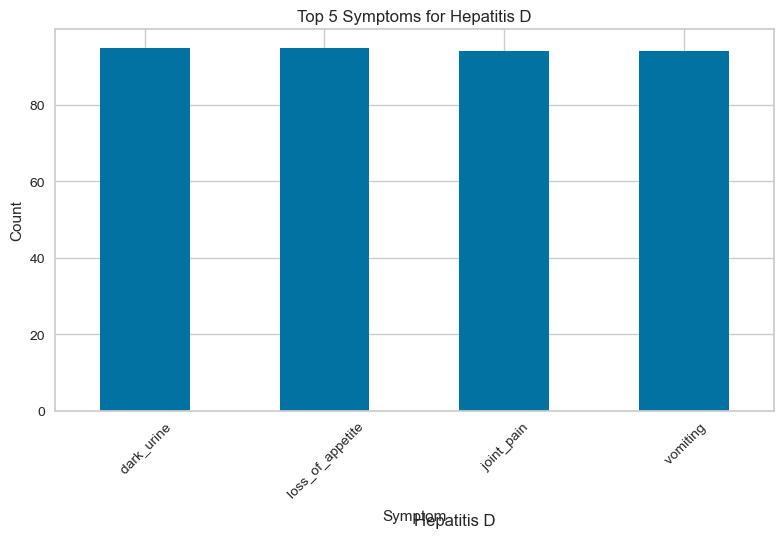

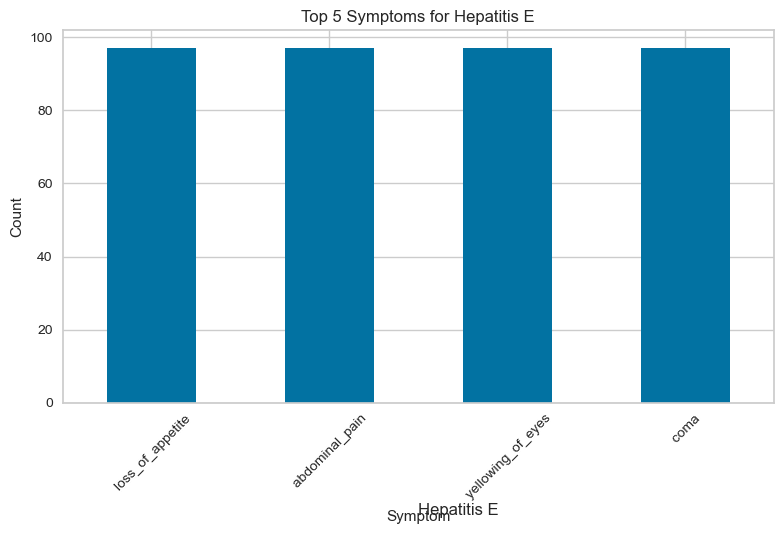

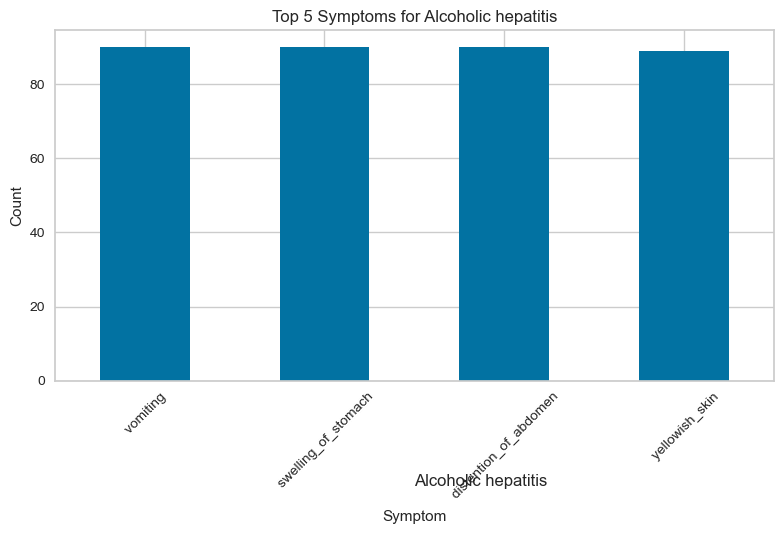

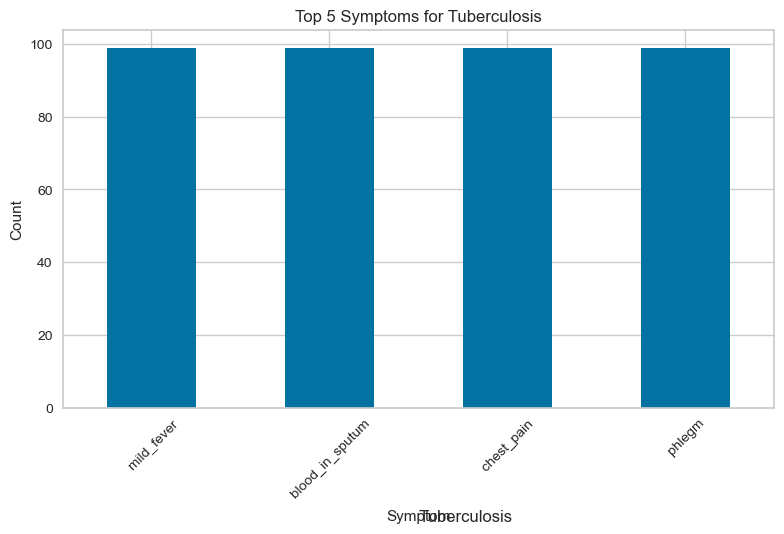

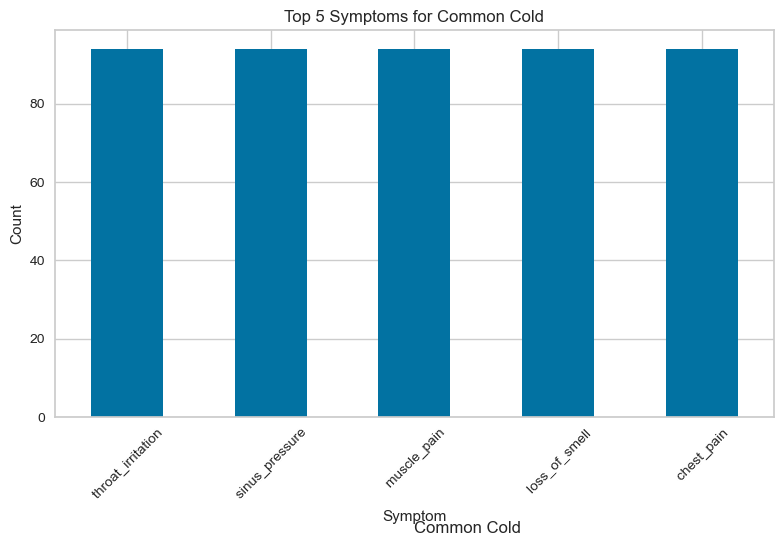

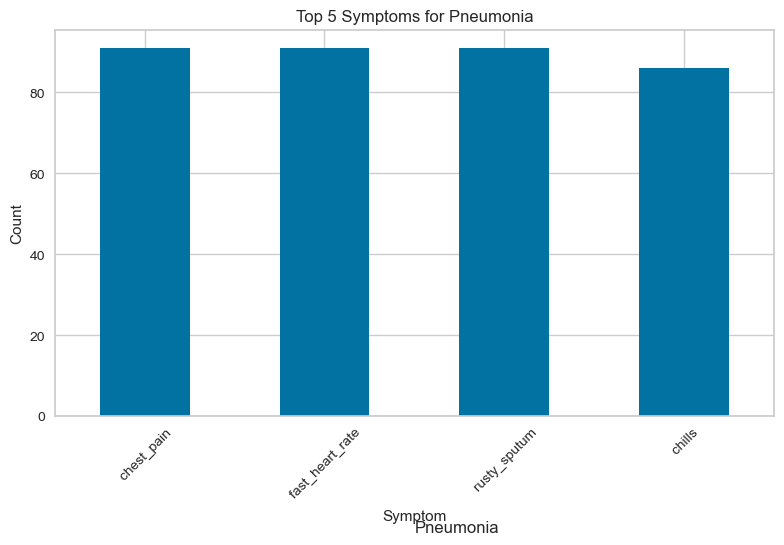

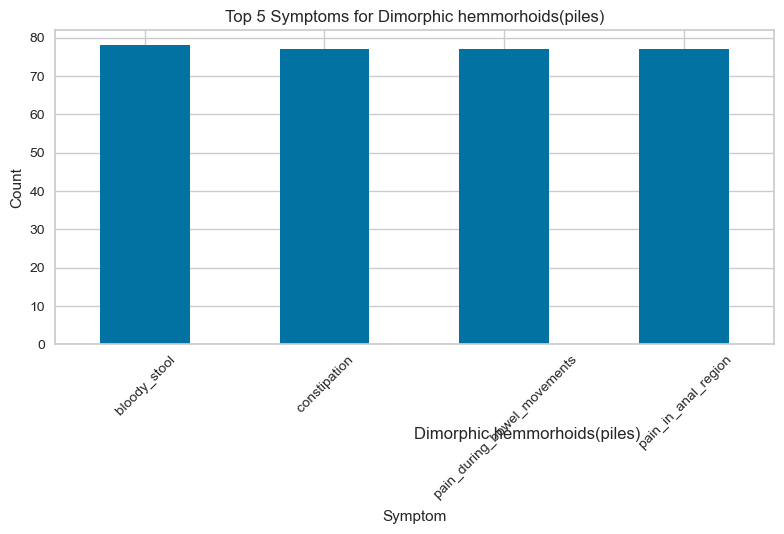

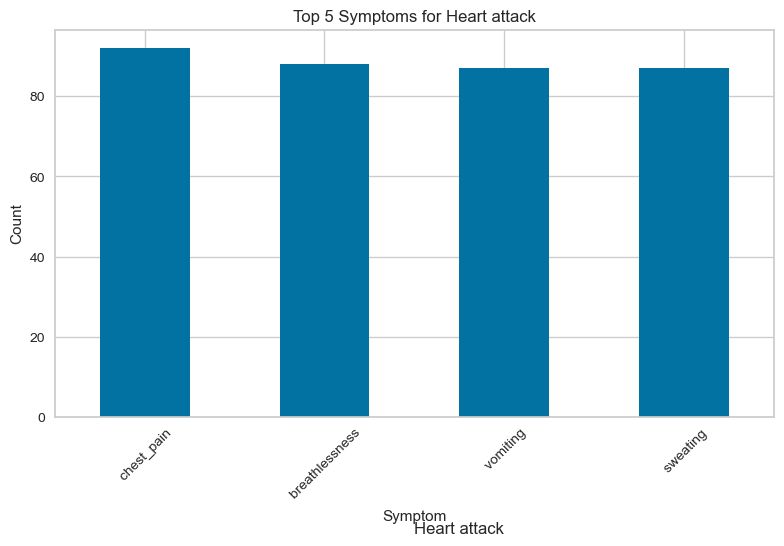

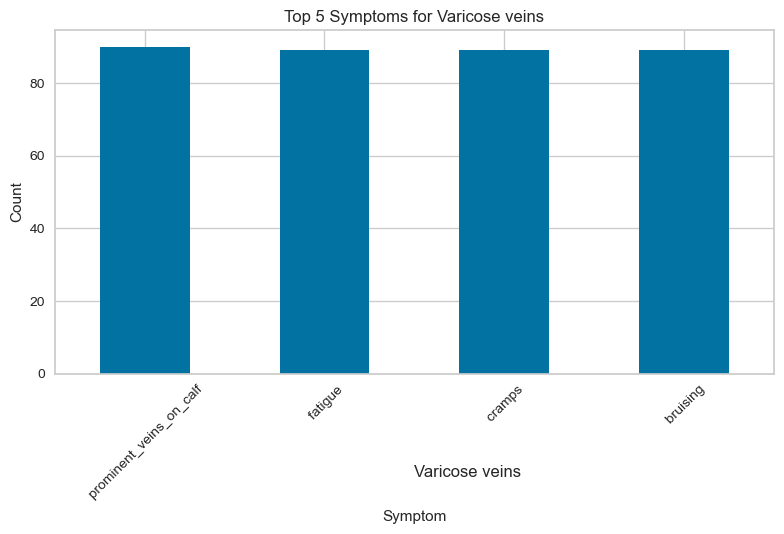

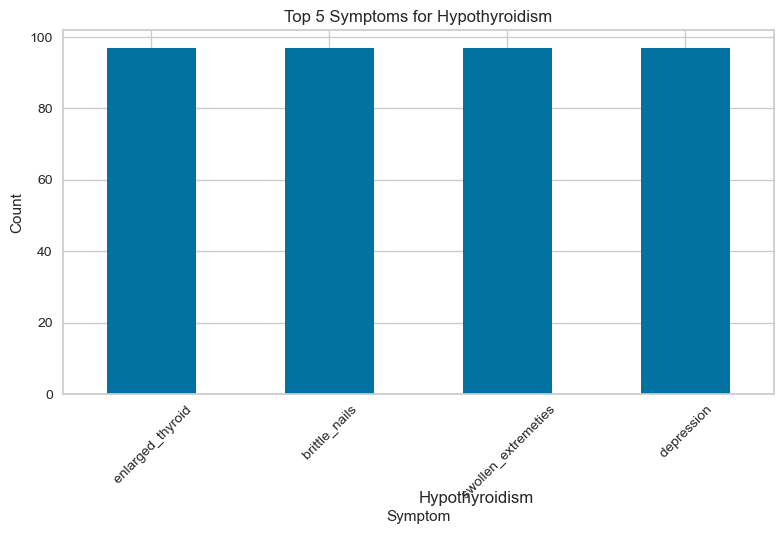

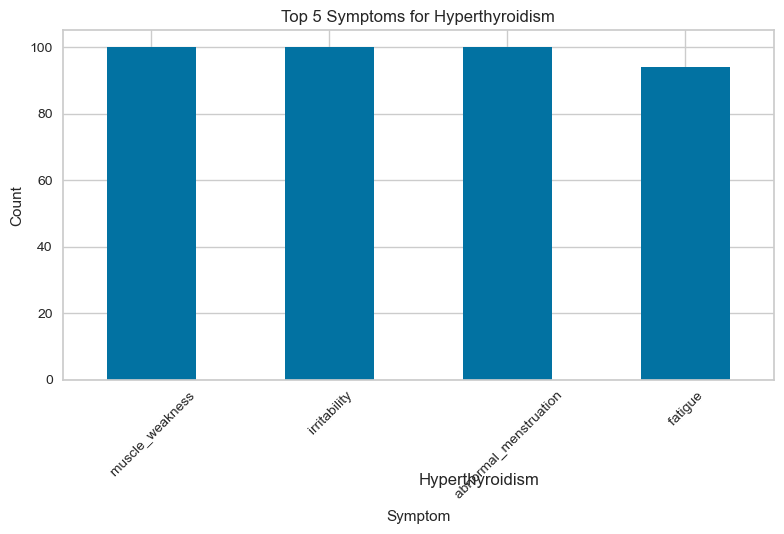

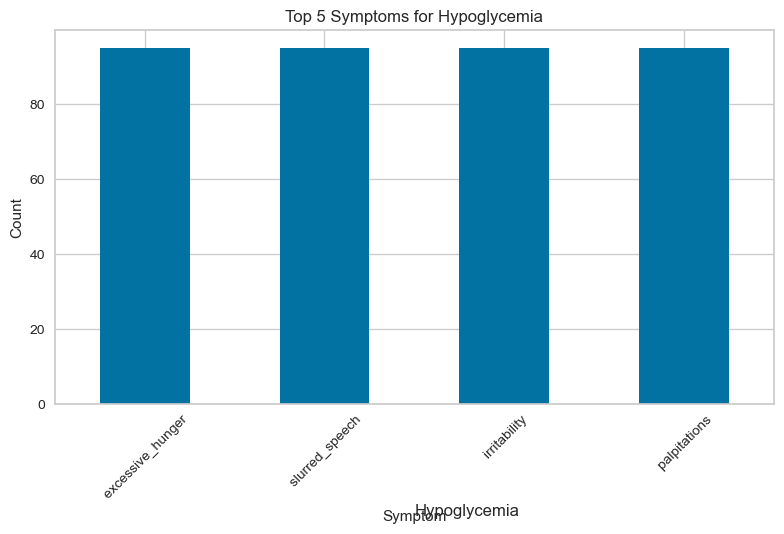

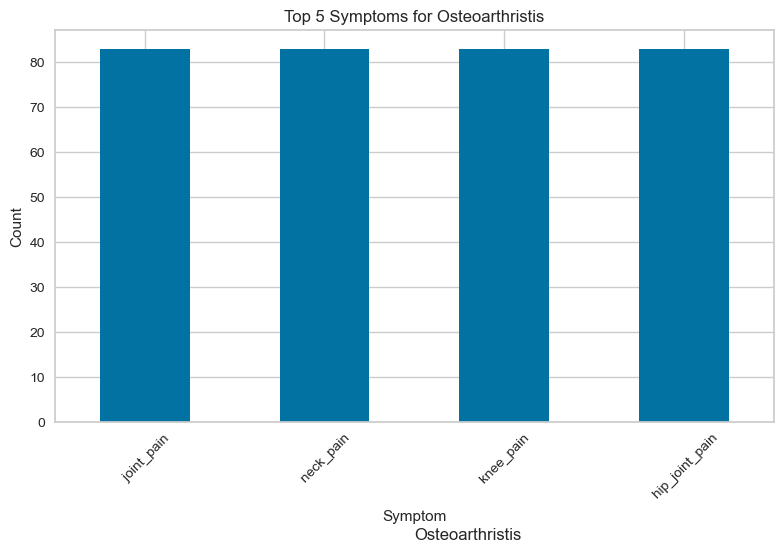

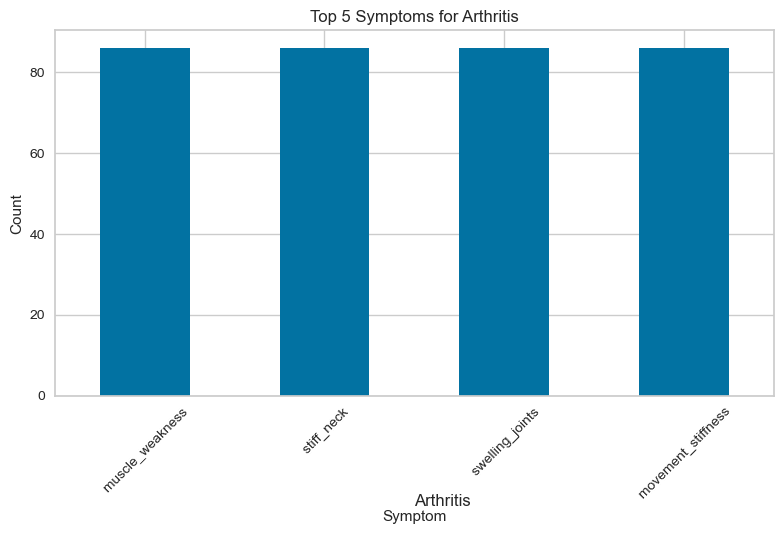

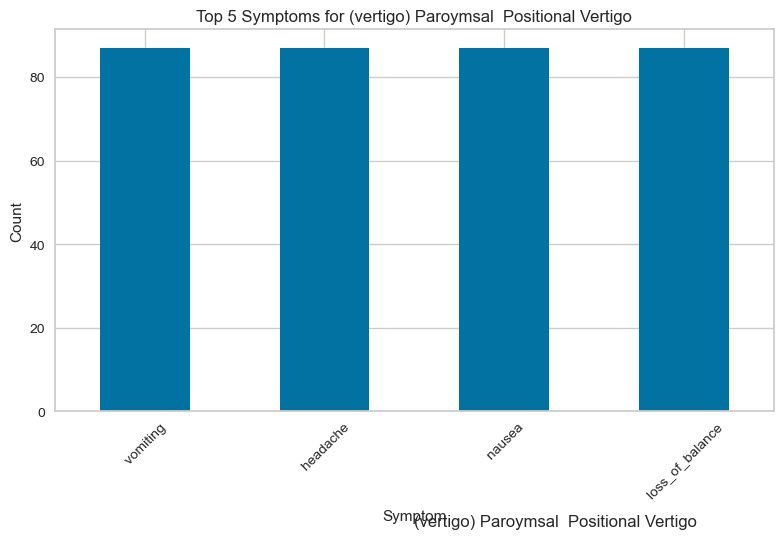

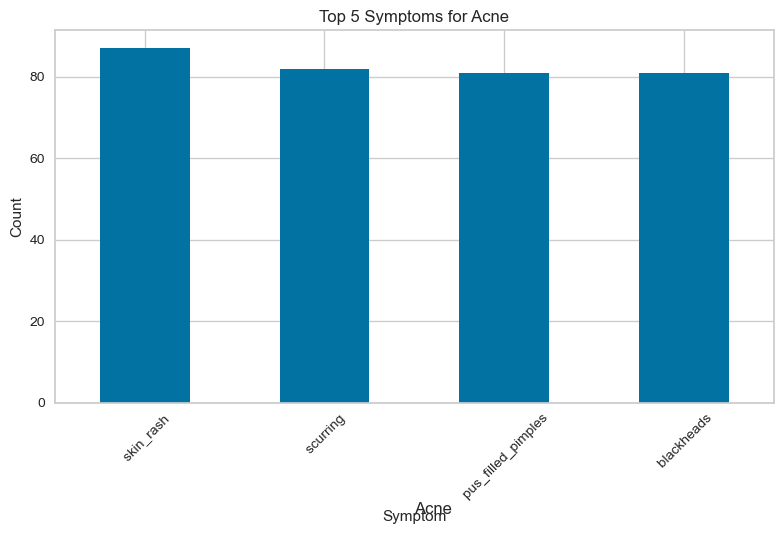

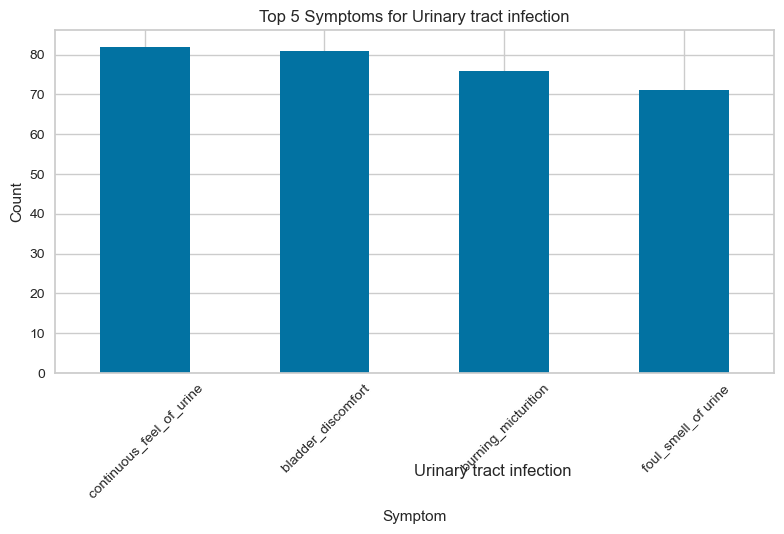

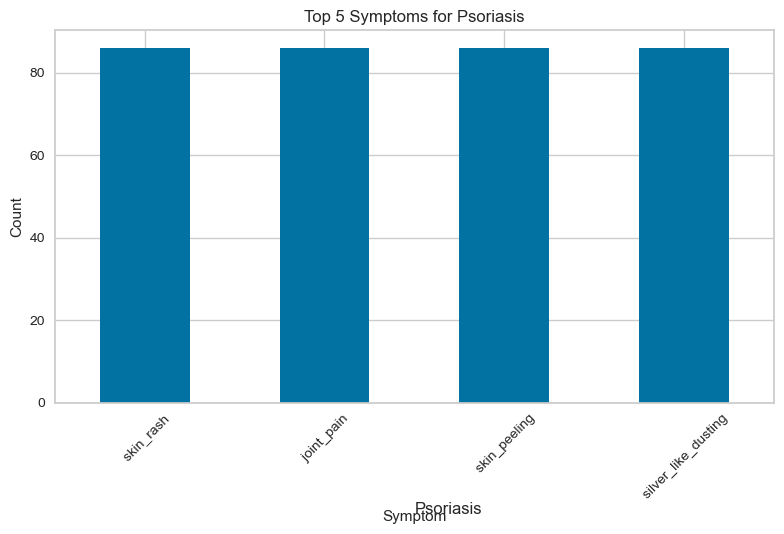

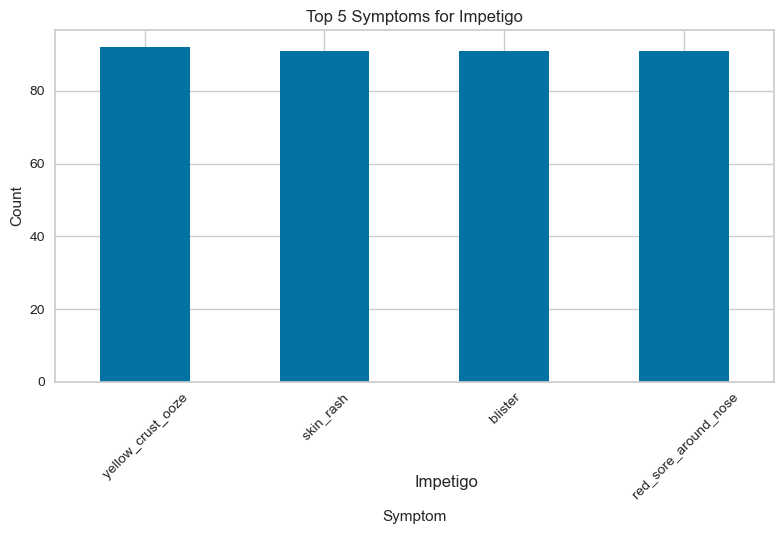

In [11]:
# Assuming you have a DataFrame called df_1
# Replace 'df_1' with the actual name of your DataFrame

# Combine all symptom columns into a single column
symptoms = df[['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
                 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
                 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12',
                 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16',
                 'Symptom_17']]

# Count the occurrences of each symptom
symptom_counts = symptoms.apply(pd.Series.value_counts).sum(axis=1).sort_values(ascending=False)

# Get the top 5 symptoms for each disease
top_5_symptoms = {}
for disease in df['Disease'].unique():
    disease_symptoms = symptoms[df['Disease'] == disease].stack().value_counts().head(5)
    top_5_symptoms[disease] = disease_symptoms

# Plot the bar chart for each disease
for disease in df['Disease'].unique():
    plt.figure()
    disease_symptoms = top_5_symptoms[disease]
    if 'None' in disease_symptoms:
        disease_symptoms = disease_symptoms.drop('None')  # Exclude 'None' value if present
    disease_symptoms.plot(kind='bar')
    plt.xlabel('Symptom')
    plt.ylabel('Count')
    plt.title(f'Top 5 Symptoms for {disease}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.text(0.5, -0.3, disease, transform=plt.gca().transAxes)  # Display disease name at the bottom

# Show the plots
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 4916
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Disease           3913 non-null   category
 1   Symptom_1         3913 non-null   category
 2   Symptom_2         3913 non-null   category
 3   Symptom_3         3913 non-null   category
 4   Symptom_4         3913 non-null   category
 5   Symptom_5         3913 non-null   category
 6   Symptom_6         3913 non-null   category
 7   Symptom_7         3913 non-null   category
 8   Symptom_8         3913 non-null   category
 9   Symptom_9         3913 non-null   category
 10  Symptom_10        3913 non-null   category
 11  Symptom_11        3913 non-null   category
 12  Symptom_12        3913 non-null   category
 13  Symptom_13        3913 non-null   category
 14  Symptom_14        3913 non-null   category
 15  Symptom_15        3913 non-null   category
 16  Symptom_16        3913 n

In [13]:
df_dep = pd.read_excel('Diseases Department and Hospital.xlsx')
df_dep = df_dep[['Disease','Department','Hospital']]
# df_dep = df_dep[df_dep['Disease'].isin(['Dengue','Hepatitis D','Migraine','Jaundice','Impetigo'])] 
df_dep

,Disease,Department,Hospital
0,Hepatitis D,gastroenterology,King Abdullah Hospital
1,Dengue,pediatrics,King Khalid Hospital
2,Chicken pox,pediatrics,HMC
3,Migraine,Neurology,Dallah
4,Hepatitis B,Gastroenterology,King Khalid Hospital
5,Hypoglycemia,Endocrinology,King Khalid Hospital
6,Common Cold,Primary Care,HMC
7,Tuberculosis,Pulmonology,King Khalid Hospital
8,Hepatitis E,Gastroenterology,King Khalid Hospital
9,hepatitis A,Gastroenterology,King Khalid Hospital


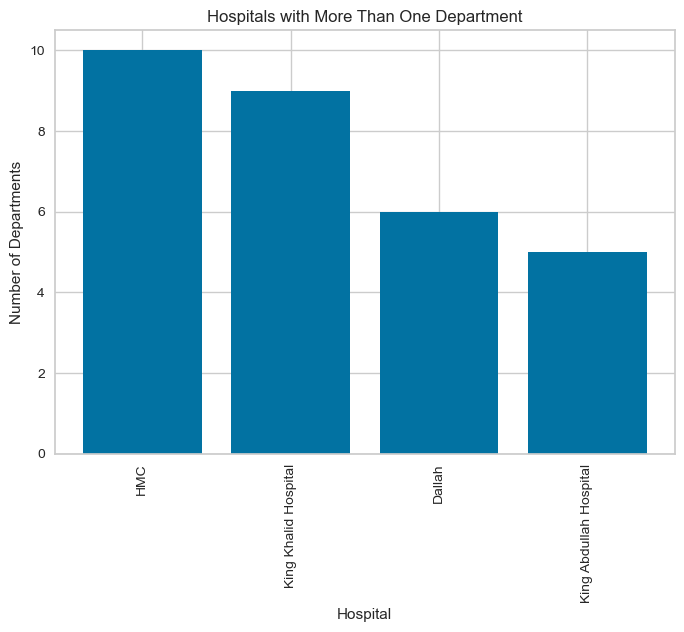

In [14]:
# Count the number of unique departments per hospital
hospital_department_counts = df_dep.groupby('Hospital')['Department'].nunique()

# Filter hospitals with more than one department
hospitals_with_multiple_departments = hospital_department_counts[hospital_department_counts > 1]

# Sort the hospitals by the number of departments in descending order
sorted_hospitals = hospitals_with_multiple_departments.sort_values(ascending=False)

# Plot the sorted hospitals as a bar graph
plt.bar(sorted_hospitals.index, sorted_hospitals.values)

# Add labels and title to the plot
plt.xlabel('Hospital')
plt.ylabel('Number of Departments')
plt.title('Hospitals with More Than One Department')

# Rotate x-axis labels for better visibility if needed
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [15]:
df = pd.merge(df,df_dep,on=['Disease'],how='left')
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,ages,pregnant,chronic_diseases,Department,Hospital
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,...,None,None,None,None,None,31,No,No,Dermatology,HMC
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,36,No,No,Dermatology,HMC
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,23,No,No,Dermatology,HMC
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,39,No,No,Dermatology,HMC
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,...,None,None,None,None,None,48,Yes,Yes,Dermatology,HMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,None,None,...,None,None,None,None,None,51,No,No,Phlebology,King Abdullah Hospital
3909,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,...,abnormal_menstruation,None,None,None,None,52,No,No,Endocrinology,Dallah
3910,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,...,None,None,None,None,None,28,Yes,No,Endocrinology,HMC
3911,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,None,None,None,...,None,None,None,None,None,60,No,No,Otolaryngology,King Khalid Hospital


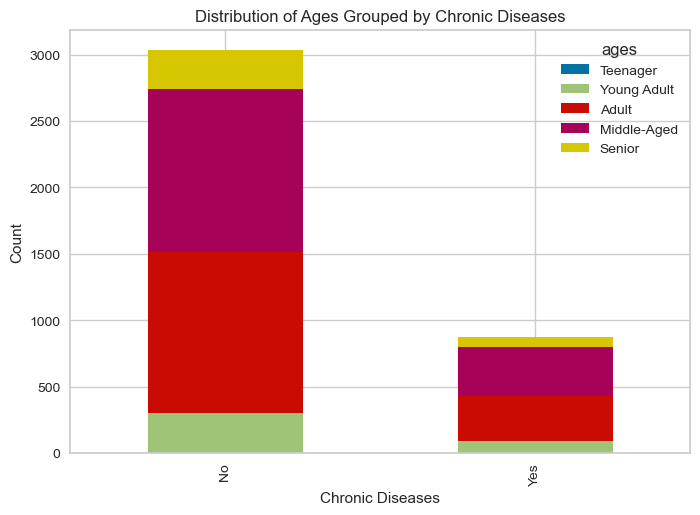

In [16]:
import matplotlib.pyplot as plt

# Define the age categories
age_categories = ['Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']

# Group the ages by chronic diseases
grouped_data = df.groupby(['chronic_diseases', pd.cut(df['ages'], bins=[0, 12, 19, 39, 59, 100], labels=age_categories)]).size().unstack()

# Plot the grouped data
grouped_data.plot(kind='bar', stacked=True)

# Add labels and title to the plot
plt.xlabel('Chronic Diseases')
plt.ylabel('Count')
plt.title('Distribution of Ages Grouped by Chronic Diseases')

# Show the plot
plt.show()

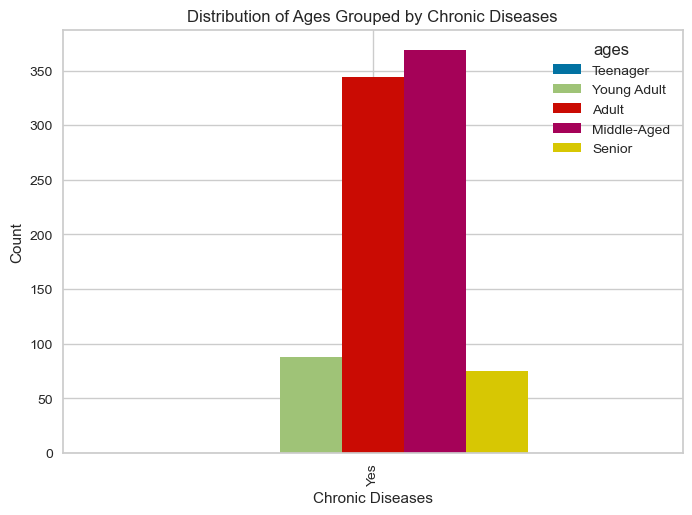

In [17]:
# Define the age categories
age_categories = ['Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']

# Group the ages by chronic diseases
grouped_data = df[df['chronic_diseases'] == 'Yes' ].groupby(['chronic_diseases', pd.cut(df['ages'], bins=[0, 12, 19, 39, 59, 100], labels=age_categories)]).size().unstack()

# Plot the grouped data
grouped_data.plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Chronic Diseases')
plt.ylabel('Count')
plt.title('Distribution of Ages Grouped by Chronic Diseases')

# Show the plot
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3912
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Disease           3913 non-null   object  
 1   Symptom_1         3913 non-null   category
 2   Symptom_2         3913 non-null   category
 3   Symptom_3         3913 non-null   category
 4   Symptom_4         3913 non-null   category
 5   Symptom_5         3913 non-null   category
 6   Symptom_6         3913 non-null   category
 7   Symptom_7         3913 non-null   category
 8   Symptom_8         3913 non-null   category
 9   Symptom_9         3913 non-null   category
 10  Symptom_10        3913 non-null   category
 11  Symptom_11        3913 non-null   category
 12  Symptom_12        3913 non-null   category
 13  Symptom_13        3913 non-null   category
 14  Symptom_14        3913 non-null   category
 15  Symptom_15        3913 non-null   category
 16  Symptom_16        3913 n

In [20]:
# Group the ages by age categories
# Define the age categories
age_categories = ['Teenager', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']

df['Group_age'] = pd.cut(df['ages'], bins=[0, 12, 19, 39, 59, 100], labels=age_categories)

In [25]:
df_1 = df[['Disease', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
       'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9',
       'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14','Symptom_15','Symptom_16','Symptom_17',
       'Group_age', 'pregnant', 'chronic_diseases']]

In [30]:
df_1

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17,Group_age,pregnant,chronic_diseases
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,...,None,None,None,None,None,None,None,Adult,No,No
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Adult,No,No
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Adult,No,No
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Adult,No,No
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,...,None,None,None,None,None,None,None,Middle-Aged,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,None,None,...,None,None,None,None,None,None,None,Middle-Aged,No,No
3909,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,...,depression,irritability,abnormal_menstruation,None,None,None,None,Middle-Aged,No,No
3910,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,...,abnormal_menstruation,None,None,None,None,None,None,Adult,Yes,No
3911,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,None,None,None,...,None,None,None,None,None,None,None,Senior,No,No


In [52]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_14,Symptom_15,Symptom_16,Symptom_17,ages,pregnant,chronic_diseases,Department,Hospital,Group_age
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,...,None,None,None,None,31,No,No,Dermatology,HMC,Adult
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,36,No,No,Dermatology,HMC,Adult
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,23,No,No,Dermatology,HMC,Adult
3,Fungal infection,itching,skin_rash,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,39,No,No,Dermatology,HMC,Adult
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,None,None,None,None,None,None,...,None,None,None,None,48,Yes,Yes,Dermatology,HMC,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3908,Varicose veins,fatigue,cramps,bruising,obesity,swollen_legs,swollen_blood_vessels,prominent_veins_on_calf,None,None,...,None,None,None,None,51,No,No,Phlebology,King Abdullah Hospital,Middle-Aged
3909,Hypothyroidism,fatigue,weight_gain,cold_hands_and_feets,mood_swings,lethargy,dizziness,puffy_face_and_eyes,enlarged_thyroid,brittle_nails,...,None,None,None,None,52,No,No,Endocrinology,Dallah,Middle-Aged
3910,Hyperthyroidism,fatigue,mood_swings,weight_loss,restlessness,sweating,diarrhoea,fast_heart_rate,excessive_hunger,muscle_weakness,...,None,None,None,None,28,Yes,No,Endocrinology,HMC,Adult
3911,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,None,None,None,...,None,None,None,None,60,No,No,Otolaryngology,King Khalid Hospital,Senior


In [27]:
# Load a dataset
data = df_1

# Set up the PyCaret environment
clf = setup(data, target='Disease')

# # Compare and evaluate different models
best_model = compare_models()

# Train the best model
rained_model = tune_model(best_model)

,Description,Value
0,Session id,937
1,Target,Disease
2,Target type,Multiclass
3,Target mapping,"(vertigo) Paroymsal Positional Vertigo: 0, AIDS: 1, Acne: 2, Alcoholic hepatitis: 3, Allergy: 4, Arthritis: 5, Bronchial Asthma: 6, Cervical spondylosis: 7, Chicken pox: 8, Chronic cholestasis: 9, Common Cold: 10, Dengue: 11, Diabetes : 12, Dimorphic hemmorhoids(piles): 13, Drug Reaction: 14, Fungal infection: 15, GERD: 16, Gastroenteritis: 17, Heart attack: 18, Hepatitis B: 19, Hepatitis C: 20, Hepatitis D: 21, Hepatitis E: 22, Hypertension : 23, Hyperthyroidism: 24, Hypoglycemia: 25, Hypothyroidism: 26, Impetigo: 27, Jaundice: 28, Malaria: 29, Migraine: 30, Osteoarthristis: 31, Paralysis (brain hemorrhage): 32, Peptic ulcer diseae: 33, Pneumonia: 34, Psoriasis: 35, Tuberculosis: 36, Typhoid: 37, Urinary tract infection: 38, Varicose veins: 39, hepatitis A: 40"
4,Original data shape,"(3913, 21)"
5,Transformed data shape,"(3913, 135)"
6,Transformed train set shape,"(2739, 135)"
7,Transformed test set shape,"(1174, 135)"
8,Ordinal features,3
9,Categorical features,20


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2690
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,14.0840
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.3460
rf,Random Forest Classifier,0.9931,1.0000,0.9931,0.9944,0.9929,0.9929,0.9929,0.5570
et,Extra Trees Classifier,0.9876,1.0000,0.9876,0.9898,0.9874,0.9873,0.9873,0.5030
knn,K Neighbors Classifier,0.9737,0.9999,0.9737,0.9782,0.9734,0.9730,0.9732,0.2890
lr,Logistic Regression,0.9051,0.9962,0.9051,0.9195,0.9036,0.9027,0.9032,4.9570
nb,Naive Bayes,0.9029,0.9975,0.9029,0.9248,0.9017,0.9004,0.9012,0.2950
lda,Linear Discriminant Analysis,0.8069,0.9886,0.8069,0.8533,0.8079,0.8020,0.8034,0.3070
qda,Quadratic Discriminant Analysis,0.7747,0.9941,0.7747,0.7725,0.7457,0.7690,0.7740,0.2720


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8869,0.9946,0.8869,0.9110,0.8822,0.8840,0.8885
1,0.8504,0.9920,0.8504,0.8441,0.8354,0.8466,0.8529
2,0.9124,0.9970,0.9124,0.9067,0.9000,0.9102,0.9120
3,0.7956,0.9889,0.7956,0.7915,0.7727,0.7905,0.7978
4,0.8796,0.9942,0.8796,0.8912,0.8740,0.8766,0.8811
5,0.8650,0.9918,0.8650,0.8692,0.8559,0.8616,0.8685
6,0.8613,0.9919,0.8613,0.8614,0.8476,0.8578,0.8637
7,0.8869,0.9959,0.8869,0.8828,0.8684,0.8840,0.8871
8,0.8905,0.9967,0.8905,0.9191,0.8806,0.8878,0.8898


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


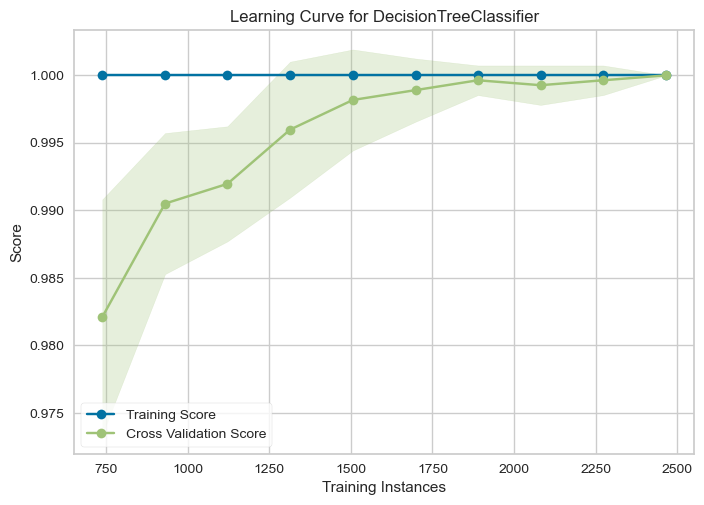

In [28]:
# Plot learning curve for the specific model
plot_model(rained_model, plot='learning')

In [45]:
# to see another deatils of the model
evaluate_model(rained_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [38]:
df.head(2)

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,...,Symptom_14,Symptom_15,Symptom_16,Symptom_17,ages,pregnant,chronic_diseases,Department,Hospital,Group_age
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,...,None,None,None,None,31,No,No,Dermatology,HMC,Adult
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,None,None,None,None,None,None,...,None,None,None,None,36,No,No,Dermatology,HMC,Adult


In [57]:
the_choosing_Department = 'Dermatology'
the_choosing_Hospital = 'HMC'
data_test = pd.DataFrame({
    'Symptom_1': ['itching'],
    'Symptom_2': ['nodal_skin_eruptions'],
    'Symptom_3': ['dischromic_patches'],
    'Symptom_4': ['None'],
    'Symptom_5': ['None'],
    'Symptom_6': ['None'],
    'Symptom_7': ['None'],
    'Symptom_8': ['None'],
    'Symptom_9': ['None'],
    'Symptom_10': ['None'],
    'Symptom_11': ['None'],
    'Symptom_12': ['None'],
    'Symptom_13': ['None'],
    'Symptom_14': ['None'],
    'Symptom_15': ['None'],
    'Symptom_16': ['None'],
    'Symptom_17': ['None'],
    'Group_age': ['Senior'],
    'pregnant': ['No'],
    'chronic_diseases': ['No']
})

def print_symptoms_demographics(dataframe):
    for index, row in dataframe.iterrows():
        symptoms = [symptom for symptom in row.values if symptom != 'None']
        demographics = {
            'Group Age': row['Group_age'],
            'Pregnant': row['pregnant'],
            'Chronic Diseases': row['chronic_diseases']
        }
        symptom_message = f"Row {index + 1} Symptoms: {', '.join(symptoms[:-3])}"
        demographics_message = f"Demographics: {demographics}"
        print(symptom_message)
        print(demographics_message)
        print()

print_symptoms_demographics(data_test)

# View the predictions
predicted_disease = predictions['prediction_label'].iloc[0]


# Print the predicted disease value
print("Predicted Disease:", predicted_disease)
print("The Department:", the_choosing_Department)
print("Predicted Hospital:", the_choosing_Hospital)

Row 1 Symptoms: itching, nodal_skin_eruptions, dischromic_patches
Demographics: {'Group Age': 'Senior', 'Pregnant': 'No', 'Chronic Diseases': 'No'}

Predicted Disease: Fungal infection
The Department: Dermatology
Predicted Hospital: HMC
